In [1]:
from google.colab import files
uploaded = files.upload()

Saving Financial-Analytics-data1.csv to Financial-Analytics-data1.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv('Financial-Analytics-data1.csv')
print(df.head())

             Name  Mar Cap - Crore  Sales Qtr - Crore Market_Cap_Category  \
0  Reliance Inds.        583436.72           99810.00           Large Cap   
1             TCS        563709.84           30904.00           Large Cap   
2       HDFC Bank        482953.59           20581.27           Large Cap   
3             ITC        320985.27            9772.02           Large Cap   
4         H D F C        289497.37           16840.51           Large Cap   

  Sales_Qrt_Category  
0         High Sales  
1         High Sales  
2         High Sales  
3         High Sales  
4         High Sales  


In [7]:
print(df.shape)

(459, 5)


In [9]:
print(df.columns)
print(df.dtypes)

Index(['Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Market_Cap_Category',
       'Sales_Qrt_Category'],
      dtype='object')
Name                    object
Mar Cap - Crore        float64
Sales Qtr - Crore      float64
Market_Cap_Category     object
Sales_Qrt_Category      object
dtype: object


In [12]:
print(df.isna().sum())

Name                   0
Mar Cap - Crore        0
Sales Qtr - Crore      0
Market_Cap_Category    0
Sales_Qrt_Category     0
dtype: int64


In [13]:
print(df.duplicated().sum())

0


clean data here

In [14]:
df = df.drop_duplicates()
print('removed_duplicates')

removed_duplicates


In [15]:
df['Name'] = df['Name'].str.strip()
print('cleaned')

cleaned


In [16]:
df.columns = ['Company', 'Market_Cap', 'Quarterly_Sales',
              'Market_Cap_Category', 'Sales_Category']

In [17]:
df['Market_Cap']=df['Market_Cap'].round(2)
df['Quarterly_Sales'] = df['Quarterly_Sales'].round(2)
print("numbers rounded!")

numbers rounded!


In [18]:
df['sales_to_market_cap'] = (df['Quarterly_Sales']/df['Market_Cap']*100).round(2)
print(df.head())

          Company  Market_Cap  Quarterly_Sales Market_Cap_Category  \
0  Reliance Inds.   583436.72         99810.00           Large Cap   
1             TCS   563709.84         30904.00           Large Cap   
2       HDFC Bank   482953.59         20581.27           Large Cap   
3             ITC   320985.27          9772.02           Large Cap   
4         H D F C   289497.37         16840.51           Large Cap   

  Sales_Category  sales_to_market_cap  
0     High Sales                17.11  
1     High Sales                 5.48  
2     High Sales                 4.26  
3     High Sales                 3.04  
4     High Sales                 5.82  


In [23]:
print('final shape:', df.shape)
print('\n Missing values:')
print(df.isna().sum())
print('\n data cleaning is completed')

final shape: (459, 6)

 Missing values:
Company                0
Market_Cap             0
Quarterly_Sales        0
Market_Cap_Category    0
Sales_Category         0
sales_to_market_cap    0
dtype: int64

 data cleaning is completed


data visualisation and graphs


/tmp/ipython-input-271868430.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Market_Cap', y='Company', data=top10, palette='viridis')


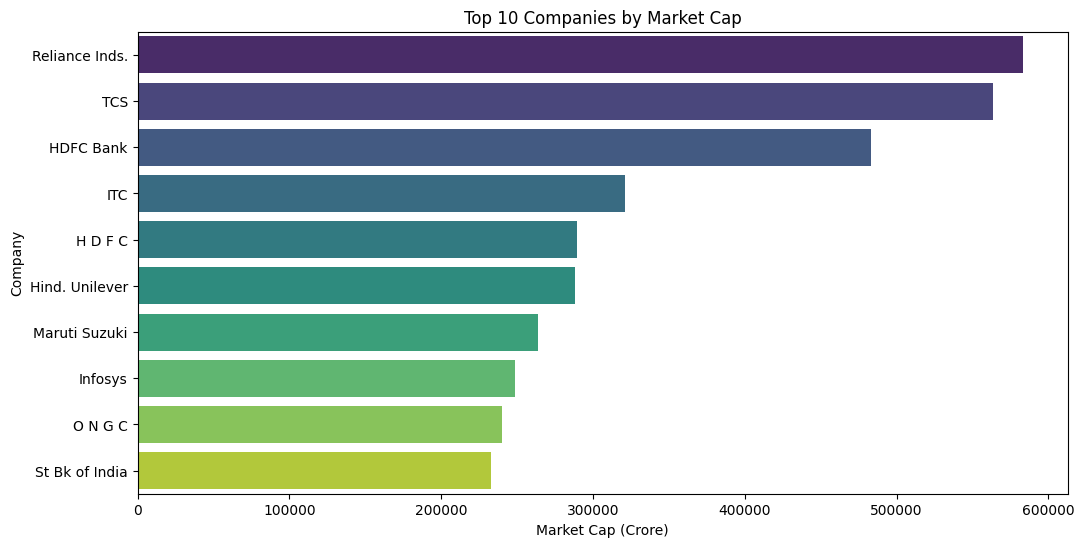

In [24]:
plt.figure(figsize=(12,6))
top10 = df.nlargest(10, 'Market_Cap')
sns.barplot(x='Market_Cap', y='Company', data=top10, palette='viridis')
plt.title('Top 10 Companies by Market Cap')
plt.xlabel('Market Cap (Crore)')
plt.ylabel('Company')
plt.show()

/tmp/ipython-input-1646741756.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quarterly_Sales', y='Company', data=top10_sales, palette='rocket')


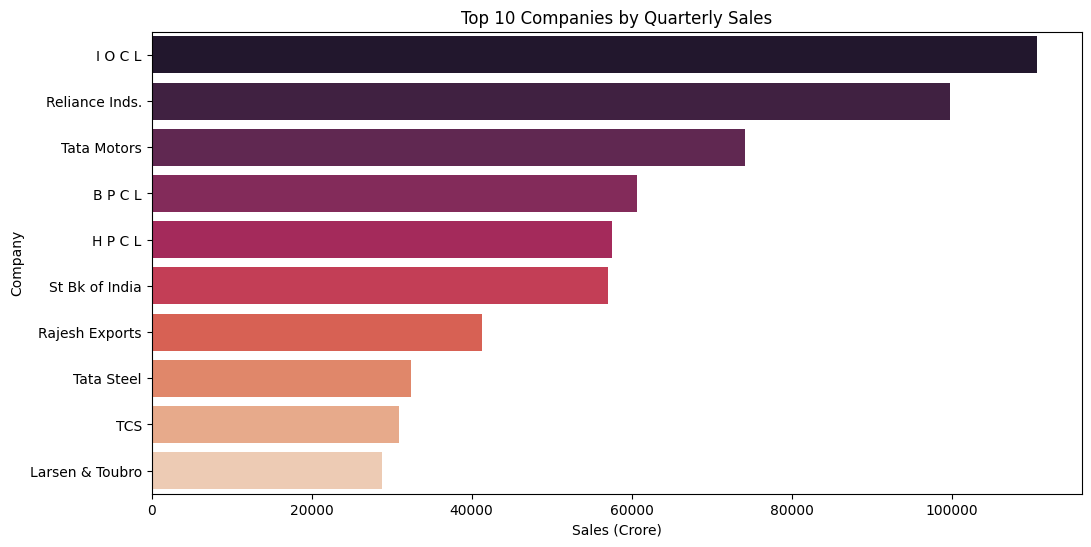

In [25]:
plt.figure(figsize=(12,6))
top10_sales = df.nlargest(10, 'Quarterly_Sales')
sns.barplot(x='Quarterly_Sales', y='Company', data=top10_sales, palette='rocket')
plt.title('Top 10 Companies by Quarterly Sales')
plt.xlabel('Sales (Crore)')
plt.ylabel('Company')
plt.show()

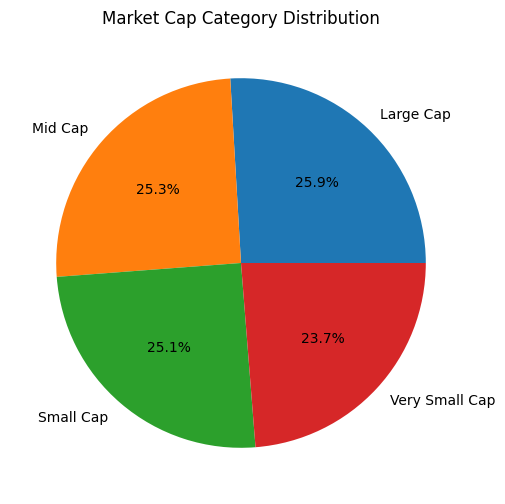

In [26]:
plt.figure(figsize=(8,6))
df['Market_Cap_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Market Cap Category Distribution')
plt.ylabel('')
plt.show()

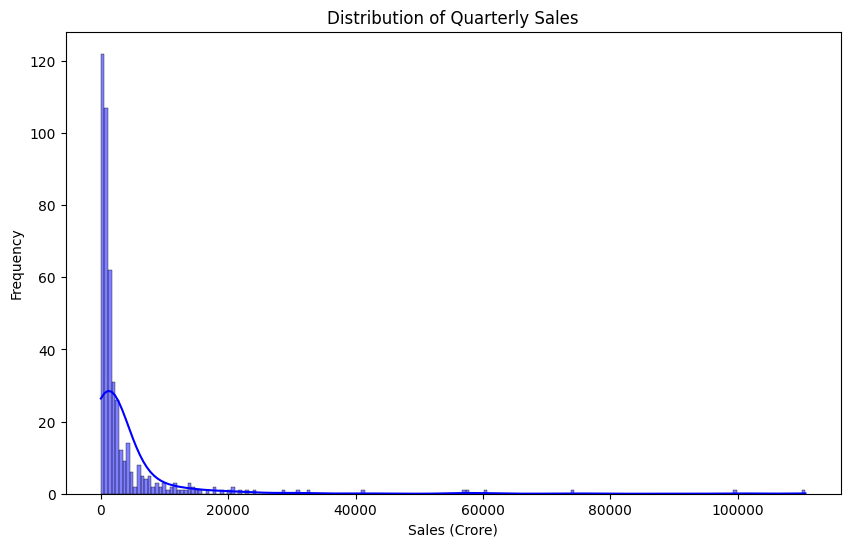

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(df['Quarterly_Sales'], kde=True, color='blue')
plt.title('Distribution of Quarterly Sales')
plt.xlabel('Sales (Crore)')
plt.ylabel('Frequency')
plt.show()

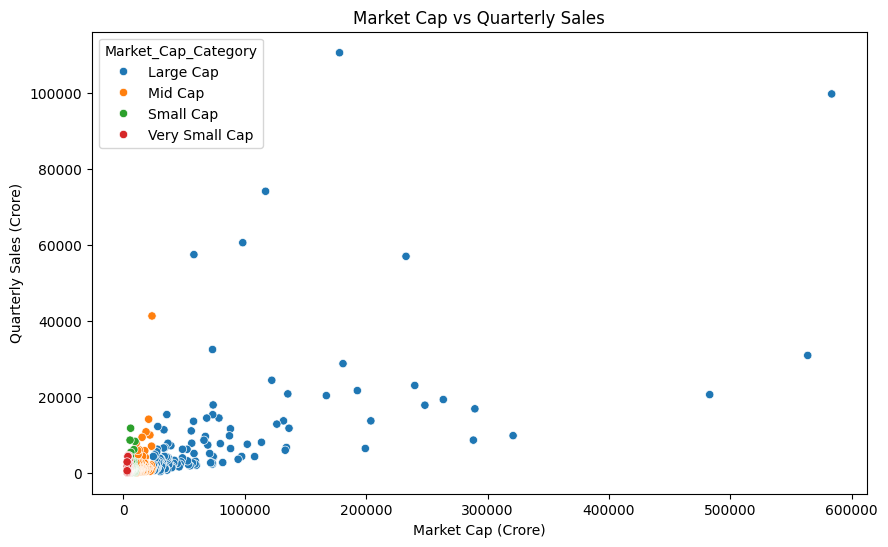

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Market_Cap', y='Quarterly_Sales',
                hue='Market_Cap_Category', data=df)
plt.title('Market Cap vs Quarterly Sales')
plt.xlabel('Market Cap (Crore)')
plt.ylabel('Quarterly Sales (Crore)')
plt.show()

In [29]:
def financial_chatbot(query):
    query = query.lower().strip()

In [30]:
def financial_chatbot(query):
    query = query.lower().strip()

    # Question 1
    if "largest company" in query:
        top = df.nlargest(1, 'Market_Cap').iloc[0]
        return f"Largest company is {top['Company']} with ₹{top['Market_Cap']:,.2f} Crore!"

    # Question 2
    elif "highest sales" in query:
        top = df.nlargest(1, 'Quarterly_Sales').iloc[0]
        return f"Highest sales company is {top['Company']} with ₹{top['Quarterly_Sales']:,.2f} Crore!"

    # Question 3
    elif "how many companies" in query:
        return f"There are {len(df)} companies in this dataset!"

    # Question 4
    elif "large cap" in query:
        count = len(df[df['Market_Cap_Category']=='Large Cap'])
        return f"There are {count} Large Cap companies!"

    # Question 5
    elif "average market cap" in query:
        avg = df['Market_Cap'].mean()
        return f"Average Market Cap is ₹{avg:,.2f} Crore!"

    # Question 6
    elif "average sales" in query:
        avg = df['Quarterly_Sales'].mean()
        return f"Average Quarterly Sales is ₹{avg:,.2f} Crore!"

    # Question 7
    elif "top 5" in query:
        top5 = df.nlargest(5, 'Market_Cap')[['Company','Market_Cap']]
        return f"Top 5 companies:\n{top5.to_string(index=False)}"

    # Question 8
    elif "reliance" in query:
        row = df[df['Company'].str.contains('Reliance', case=False)].iloc[0]
        return f"Reliance - Market Cap: ₹{row['Market_Cap']:,.2f} Crore, Sales: ₹{row['Quarterly_Sales']:,.2f} Crore"

    # Question 9
    elif "tcs" in query:
        row = df[df['Company'].str.contains('TCS', case=False)].iloc[0]
        return f"TCS - Market Cap: ₹{row['Market_Cap']:,.2f} Crore, Sales: ₹{row['Quarterly_Sales']:,.2f} Crore"

    # Help option
    elif "help" in query:
        return """I can answer these questions:
1. Who is the largest company?
2. Which company has highest sales?
3. How many companies are there?
4. How many large cap companies?
5. What is average market cap?
6. What is average sales?
7. Show top 5 companies
8. Tell me about Reliance
9. Tell me about TCS"""

    # Default response
    else:
        return "Sorry I don't understand! Type 'help' to see what I can answer!"

In [ ]:
print("="*50)
print("AI Financial Chatbot - Deepika H")
print("="*50)
print("Type 'help' to see options")
print("Type 'quit' to exit")
print("="*50)

while True:
    user_input = input("\nYou: ")
    if user_input.lower() == 'quit':
        print("Chatbot: Goodbye Deepika!")
        break
    response = financial_chatbot(user_input)
    print(f"Chatbot: {response}")

AI Financial Chatbot - Deepika H
Type 'help' to see options
Type 'quit' to exit

You: "Who is the largest company?"
Chatbot: Largest company is Reliance Inds. with ₹583,436.72 Crore!

You: "help"
Chatbot: I can answer these questions:
1. Who is the largest company?
2. Which company has highest sales?
3. How many companies are there?
4. How many large cap companies?
5. What is average market cap?
6. What is average sales?
7. Show top 5 companies
8. Tell me about Reliance
9. Tell me about TCS

You: Which company has highest sales?
Chatbot: Highest sales company is I O C L with ₹110,666.93 Crore!
